# some initial performance tests of iterative solvers in eigen
## Machine: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
## Model: ThermoRichardsMechanics and ThermoRichardsFlow (2D) 3463 nodes 1e7 s iteration based time stepping

In [2]:
from os import listdir

In [ ]:
import matplotlib.pyplot as plt

In [3]:
import plot_settings

In [22]:
plt.rcParams['figure.figsize'] = (18, 16)

In [5]:
allfiles = listdir(".")

In [6]:
TR_log = []
TRM_log = []
for file in allfiles:
    if "out" in file:
        if "_TR_" in file:
            TR_log.append(file)
        elif "_TRM_" in file:
            TRM_log.append(file)

In [7]:
TRM_log

['2D_TRM_BiCGSTAB_DIAGONAL.out',
 '2D_TRM_BiCGSTABL4_DIAGONAL.out',
 '2D_TRM_BiCGSTABL_DIAGONAL.out',
 '2D_TRM_BiCGSTABL3_DIAGONAL.out',
 '2D_TRM_IDRSTABL_DIAGONAL.out']

In [8]:
from ogs6py.ogs import OGS

In [9]:
m = OGS()

PROJECT_FILE not given. Calling it default.prj.


In [10]:
TRM_log

['2D_TRM_BiCGSTAB_DIAGONAL.out',
 '2D_TRM_BiCGSTABL4_DIAGONAL.out',
 '2D_TRM_BiCGSTABL_DIAGONAL.out',
 '2D_TRM_BiCGSTABL3_DIAGONAL.out',
 '2D_TRM_IDRSTABL_DIAGONAL.out']

In [21]:
df_TR = {}
df_TRM = {}
df_TR_iter = {}
df_TRM_iter = {}
for entry in TR_log:
    df_TR[entry] = m.parse_out(entry, filter="by_time_step")
    df_TR_iter[entry] = m.parse_out(entry, filter="time_step_vs_iterations")
for entry in TRM_log:
    df_TRM[entry] = m.parse_out(entry, filter="by_time_step")
    df_TRM_iter[entry] = m.parse_out(entry, filter="time_step_vs_iterations")

Text(0.5, 0, 'time step')

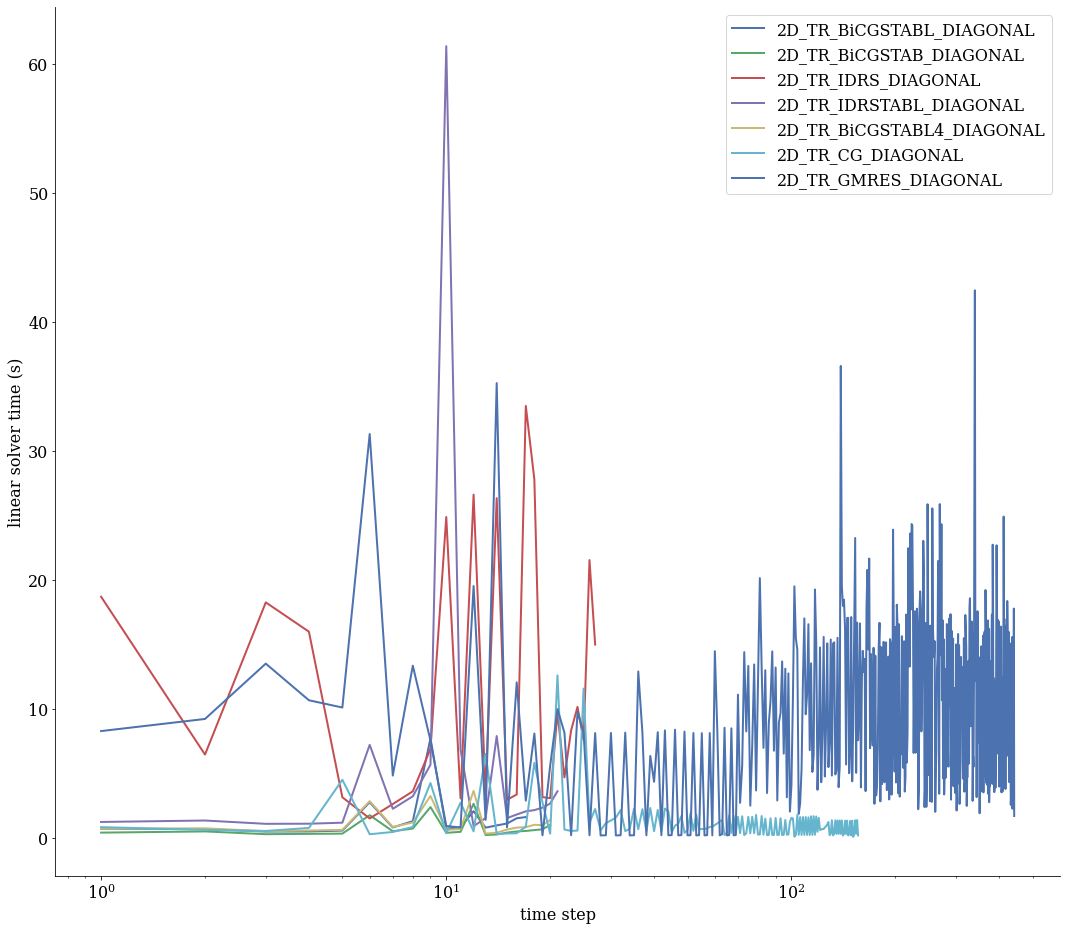

In [23]:
for entry in TR_log:
    plt.plot(df_TR[entry]["linear_solver_time"].droplevel("mpi_process"), label=entry.split(".")[0])
plt.legend()
plt.xscale('log')
plt.ylabel("linear solver time (s)")
plt.xlabel("time step")

Text(0.5, 0, 'time step')

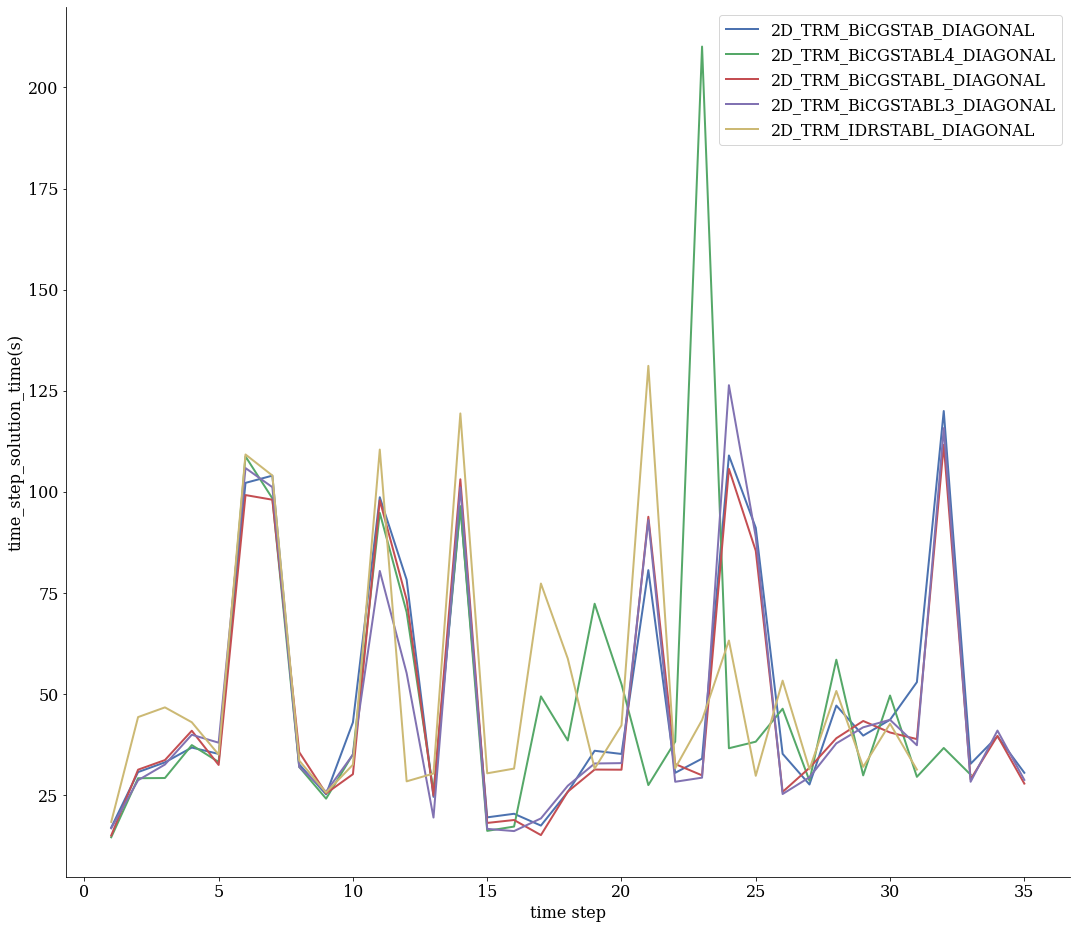

In [24]:
for entry in TRM_log:
    plt.plot(df_TRM[entry]["linear_solver_time"].droplevel("mpi_process"), label=entry.split(".")[0])
plt.legend()
plt.ylabel("time_step_solution_time(s)")
plt.xlabel("time step")

Text(0.5, 0, 'time step')

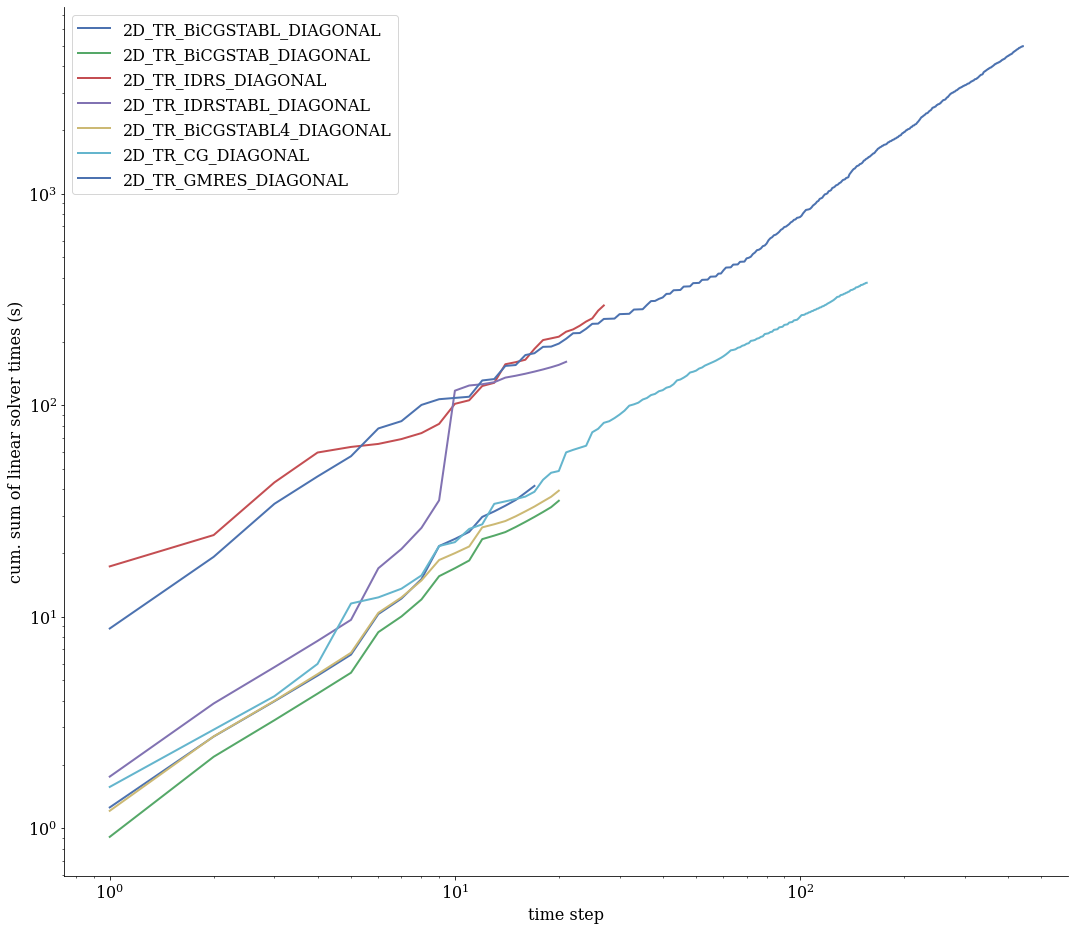

In [25]:
for entry in TR_log:
    plt.plot(df_TR[entry]["time_step_solution_time"].droplevel("mpi_process").cumsum(), label=entry.split(".")[0])
plt.legend()
plt.xscale('log')
plt.yscale("log")
plt.ylabel("cum. sum of linear solver times (s)")
plt.xlabel("time step")

Text(0.5, 0, 'time step')

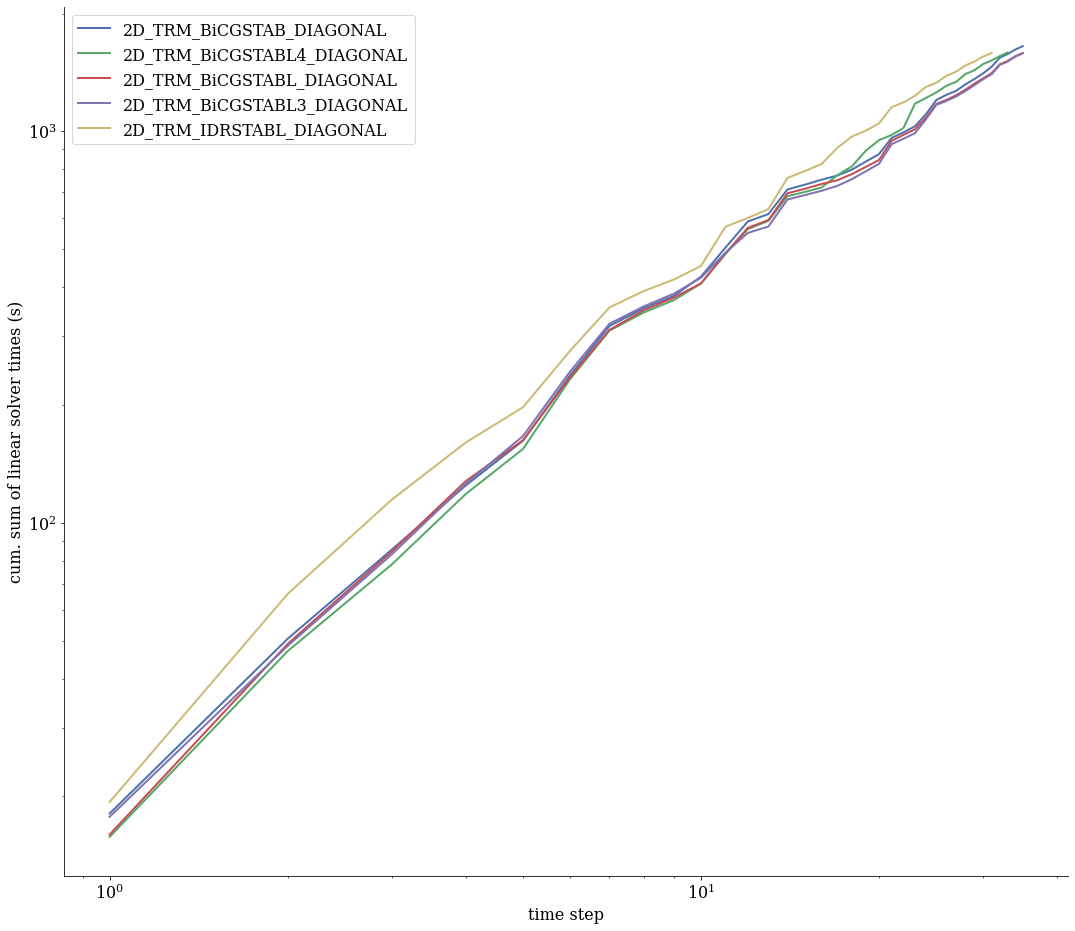

In [26]:
for entry in TRM_log:
    plt.plot(df_TRM[entry]["time_step_solution_time"].droplevel("mpi_process").cumsum(), label=entry.split(".")[0])
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("cum. sum of linear solver times (s)")
plt.xlabel("time step")

Text(0.5, 0, 'time step')

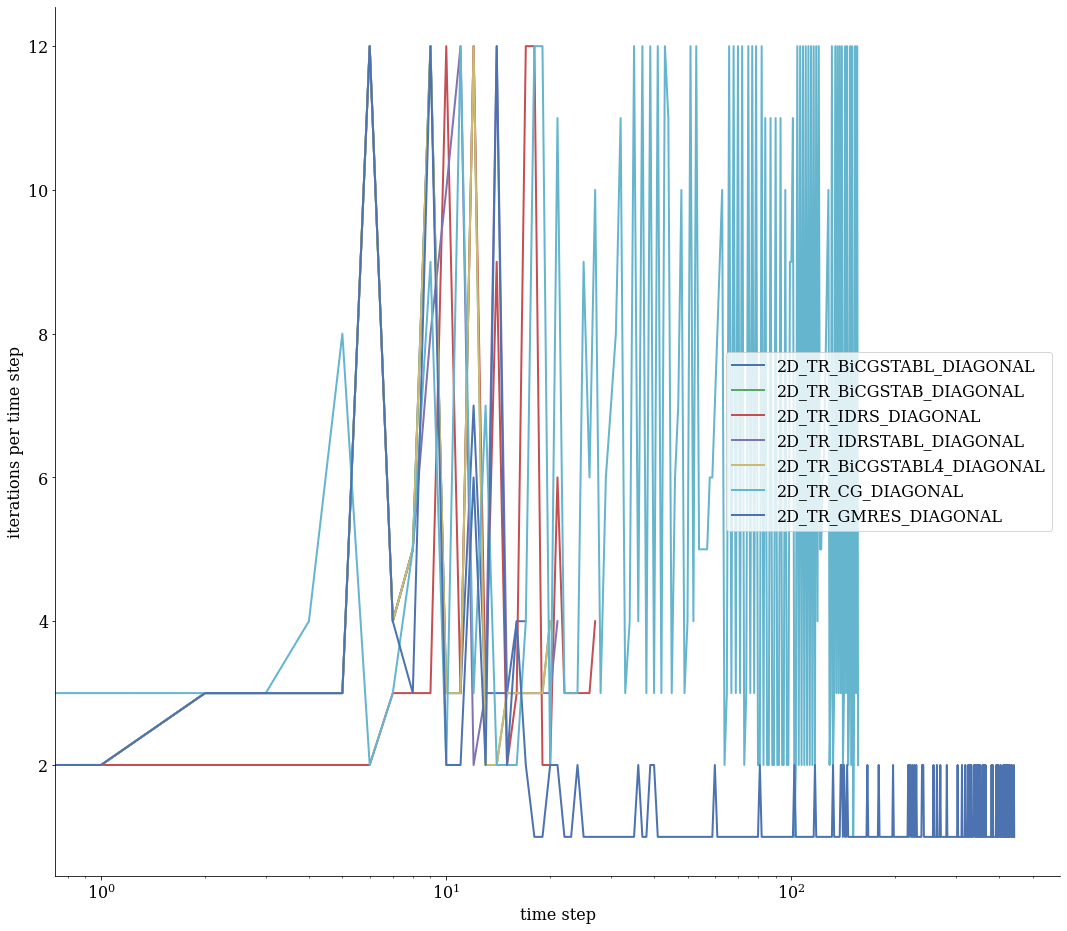

In [29]:
for entry in TR_log:
    plt.plot(df_TR_iter[entry]["iteration_number"], label=entry.split(".")[0])
plt.legend()
plt.ylabel("iterations per time step")
plt.xscale('log')
plt.xlabel("time step")

Text(0.5, 0, 'time step')

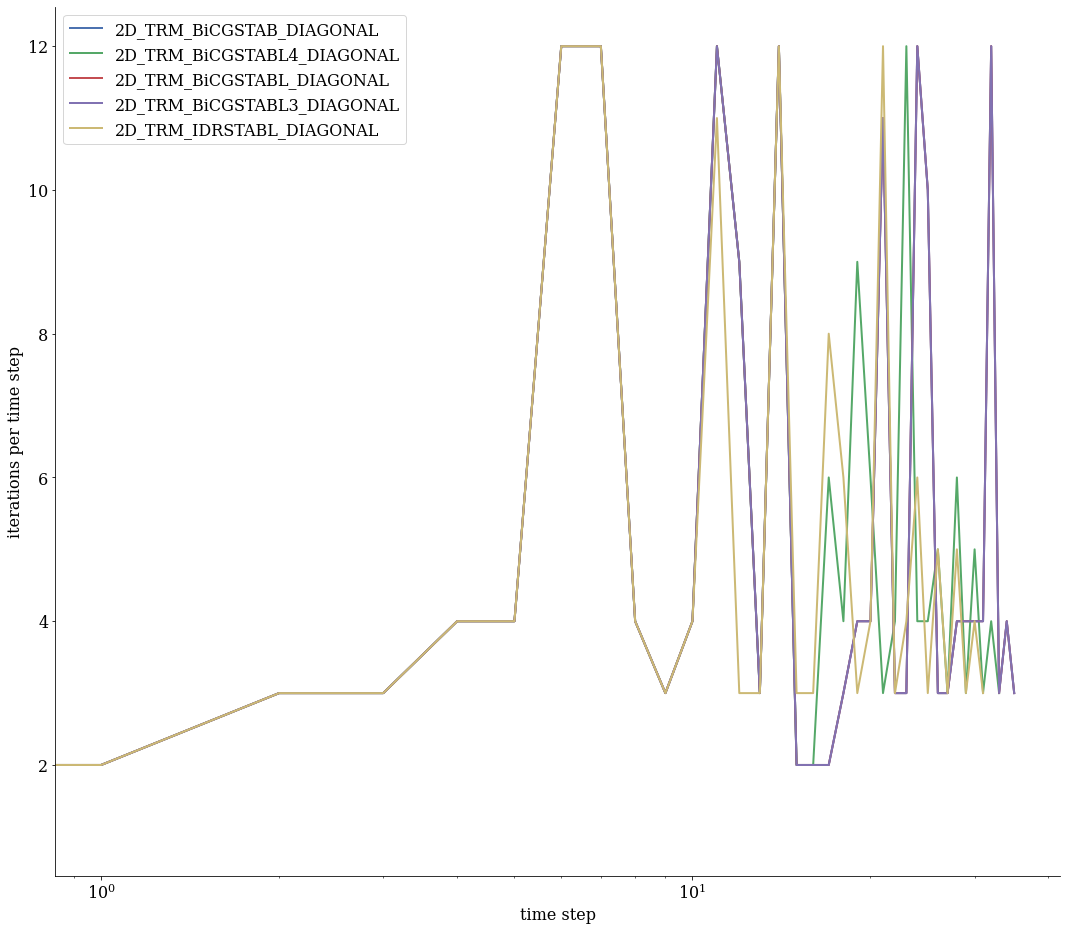

In [31]:
for entry in TRM_log:
    plt.plot(df_TRM_iter[entry]["iteration_number"], label=entry.split(".")[0])
plt.legend()
plt.ylabel("iterations per time step")
plt.xscale('log')
plt.xlabel("time step")